# Practice code for Data Science Final Exam

## Decision tree model 

In [3]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Data Loading
from sklearn.datasets import load_breast_cancer, fetch_20newsgroups, load_digits

# Scikit-learn: Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Scikit-learn: Preprocessing
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn: Metrics
from sklearn.metrics import confusion_matrix, homogeneity_score

# Scikit-learn: Decomposition
from sklearn.decomposition import PCA

# Scikit-learn: Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

# Scikit-learn: Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

# MLxtend: Visualization
from mlxtend.plotting import plot_confusion_matrix

# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [47]:
# Extract breast cancer dataset
# Visualize X features and y label (instead of the full Bunch data-structure)
X,y = load_breast_cancer(return_X_y=True)
print(f'num observations:    {X.shape[0]}') # X features
print(f'num features:        {X.shape[1]}') # y labels
print(f'target value counts: {dict(Counter(y))}')

num observations:    569
num features:        30
target value counts: {0: 212, 1: 357}


In [48]:
# Split X and y into X_train,X_test,y_train,y_test 
#    using train_test_split, 
#    stratify using y, 
#    and use the default test_size of 0.25.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size= 0.25)

# Check that the distribution of classes is similar in train and test
assert ((y_train == 0).sum() / len(y_train) - 
        (y_test == 0).sum() / len(y_test)) < .01

In [49]:
# Get a baseline by DummyClassifier
#      with strategy="prior" (the default)
#      and fit on X_train, y_train
#      store as dummyc
dummyc = DummyClassifier(strategy = 'prior').fit(X_train, y_train)

# print out the training set accuracy using dummyc.score()
#     model.score(X_train, y_train)
print(f'dummy training set accuracy: {dummyc.score(X_train, y_train):0.2f}')

# print out the test set accuracy using dummyc.score()
#     model.score(X_test, y_test)
print(f'    dummy test set accuracy: {dummyc.score(X_test, y_test):0.2f}')

dummy training set accuracy: 0.63
    dummy test set accuracy: 0.63


In [7]:
# Train and compare a Decision Tree model
# Instantiate a DecisionTreeClassifier 
#    with max_depth=10
#    and train on X_train,y_train
#    store as dtc
dtc = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)

# print out the training set accuracy using dtc.score()
print(f'dtc training set accuracy: {dtc.score(X_train, y_train):0.2f}')

# print out the test set accuracy using dtc.score()
print(f'    dtc test set accuracy: {dtc.score(X_test, y_test):0.2f}')

dtc training set accuracy: 1.00
    dtc test set accuracy: 0.93


In [ ]:
# To expose the different kinds of errors that our Decision Tree model is making, print a confusion matrix 
# generate a confusion_matrix
#    using y_test 
#    and the predictions generated by the trained dtc model on X_test
#    store as cm
cm = confusion_matrix(y_test, dtc.predict(X_test))
print(cm)

[[47  6]
 [ 4 86]]


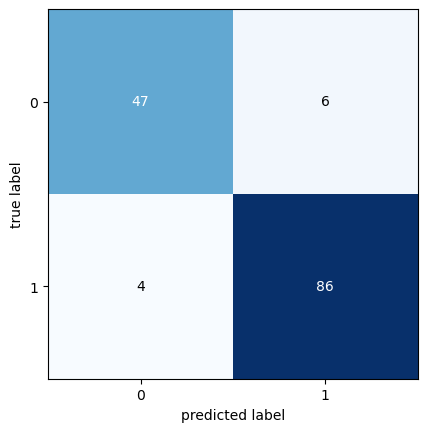

In [ ]:
# To help interpret the output of confusion_matrix, 
#    use plot_confusion_matrix from mlxtend
# call plot_confusion_matrix() on the output of confusion_matrix generated above (cm)
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()

## Data processing for missing values

In [51]:
# This data includes a datetime column DocumentDate. 
#  Use parse_dates to parse this column into datetimes
df = pd.read_csv('../data/week8_housing_data.csv',
                 parse_dates=['DocumentDate'])

#  Print df.info() to see the number of rows, column names, column datatypes and amount of missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DocumentDate  500 non-null    datetime64[ns]
 1   PropertyType  478 non-null    object        
 2   SqFtLot       489 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.8+ KB


In [52]:
# If we run df.duplicated() we get a vector of booleans that indicate duplicated rows.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [53]:
# Use df.duplicated() with default values and .sum() to assert that there are 3 duplicated rows
assert df.duplicated().sum() == 3
# There are 3 duplicated rows

In [54]:
# Use drop_duplicates() to drop the duplicated rows.
#   Compare the entire row (subset=None) and keep the first duplicate (keep='first') (the defaults)
# Store back into df
df = df.drop_duplicates(subset = None, # keep entire row
                        keep = 'first' # keep 1st duplicate
                        )

# Confirm that the correct number of rows have been dropped
assert df.shape[0] == 497

In [14]:
# Before continuing, note the is a missing SqFtLot in the first row
df.head(3)

,DocumentDate,PropertyType,SqFtLot
0,2006-11-21,Single Family,NaN
1,2007-04-16,Townhouse,937.0
2,2006-01-18,NaN,13167.0


In [15]:
# From the .info() above, we see there are missing values in SqFtLot.
#   Before we fill this column, create a new dummy column 'SqFtLot_missing' in df.
#   This column should contain integers, 1 for missing, 0 for not missing.
# Use .isna() and .astype(int) to create the 'SqFtLot_missing' column.
df['SqFtLot_missing'] = df.SqFtLot.isna().astype(int)

# Assert that the number of 1's in the SqFtLot_missing column equals the number of missing values in SqFtLot
assert df.SqFtLot_missing.sum() == df.SqFtLot.isna().sum()

# Assert that the dtype of SqFtLot_missing is int
assert df.SqFtLot_missing.dtype == int

In [16]:
# Now fill the missing values in df.SqFtLot with the mean of the SqFtLot column.
#   Use .fillna() and .mean()
# Store back into the existing SqFtLot column.
df['SqFtLot'] = df.SqFtLot.fillna(df.SqFtLot).mean()

# Assert that the SqFtLot column no longer contains any missing values (number of missing values == 0)
assert df.SqFtLot.isna().sum() == 0

In [17]:
# The missing SqFtLot should now be filled
df.head(3)

,DocumentDate,PropertyType,SqFtLot,SqFtLot_missing
0,2006-11-21,Single Family,13801.04321,1
1,2007-04-16,Townhouse,13801.04321,0
2,2006-01-18,NaN,13801.04321,0


In [18]:
# There are also missing values in PropertyType.
#   Since 'PropertyType' is categorical, let's treat MISSING as another category.
#   Fill the empty values in PropertyType with the string 'MISSING'.
# Store back into the existing PropertyType column.
df['PropertyType'] = df.PropertyType.fillna('MISSING')

# Call .value_counts() on the PropertyType column to see how many of each category exist in the dataframe.
# We should see 22 MISSING values
df.PropertyType.value_counts()

PropertyType
Single Family    455
MISSING           22
Townhouse         12
Multiplex          8
Name: count, dtype: int64

In [19]:
# Check the missing value for each feature
df.isna().sum()

DocumentDate       0
PropertyType       0
SqFtLot            0
SqFtLot_missing    0
dtype: int64

In [20]:
# Confirm we have no missing data by asserting that the sum of df.isna() over rows and columns is equal to 0.
assert df.isna().sum().sum() == 0

# Print df.info() to visualy confirm there are no missing values as well
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DocumentDate     497 non-null    datetime64[ns]
 1   PropertyType     497 non-null    object        
 2   SqFtLot          497 non-null    float64       
 3   SqFtLot_missing  497 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 19.4+ KB


In [21]:
# Before we one hot enocode PropertyType, print the first 3 rows of df and note their PropertyType values
df.head(3)

,DocumentDate,PropertyType,SqFtLot,SqFtLot_missing
0,2006-11-21,Single Family,13801.04321,1
1,2007-04-16,Townhouse,13801.04321,0
2,2006-01-18,MISSING,13801.04321,0


In [22]:
# Transform the categorical feature PropertyType using pd.get_dummies().
#   Note that we can call get_dummies on the entire dataframe and only categorical features will be transformed.
# Store the result of get_dummies into df_new
df_new = pd.get_dummies(df, 
                        drop_first= True # This drops the first dummy variable created for each categorical feature, 
                                         # to reduce the # of columns 
                                         # and to avoid collinarity issues
                        )

# Print out the first 3 rows of df_new to see the result.
df_new.head(3)

,DocumentDate,SqFtLot,SqFtLot_missing,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
0,2006-11-21,13801.04321,1,False,True,False
1,2007-04-16,13801.04321,0,False,False,True
2,2006-01-18,13801.04321,0,False,False,False


In [23]:
df_new = pd.get_dummies(df)
df_new.head(3)

,DocumentDate,SqFtLot,SqFtLot_missing,PropertyType_MISSING,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse
0,2006-11-21,13801.04321,1,False,False,True,False
1,2007-04-16,13801.04321,0,False,False,False,True
2,2006-01-18,13801.04321,0,True,False,False,False


## PCA

In [ ]:
# Load the breast cancer dataset using the load_breast_cancer() function.
# Store in the variable 'cancer'.
cancer = load_breast_cancer()

# Create a new dataframe X with values from cancer.data (which is stored as a numpy array)
#    and with columns named using cancer.feature_names (also a numpy array)
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# For this quiz, only keep the first 10 features/columns
# Store the result back into X
X = X.iloc[:, :10]

# Assert that the shape of the dataframe is (569,10): 569 rows, 10 columns
assert X.shape == (569,10)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [25]:
# The distribution of features in this dataset vary quite a bit, affecting PCA performance.
# To get a sense of the difference, display the mean and standard deviation of each feature.
# Use the .agg() function, which takes a list of strings describing the functions to apply.
# Call .agg() on X
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
X.agg(['mean', 'std']).T.round(2)

,mean,std
mean radius,14.13,3.52
mean texture,19.29,4.30
mean perimeter,91.97,24.30
mean area,654.89,351.91
mean smoothness,0.10,0.01
mean compactness,0.10,0.05
mean concavity,0.09,0.08
mean concave points,0.05,0.04
mean symmetry,0.18,0.03
mean fractal dimension,0.06,0.01


In [26]:
# Standardize the data to mean 0, standard deviation of 1 using sklearn StandardScaler

# To standardize X use StandardScaler with default settings
#  do a fit_transform() on X
#  store in X_zscore
scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

# Add feature names by creating a new DataFrame
#  containing X_zscore
#  with the same column names as the original dataframe X
#  store back into X_zscore
X_zscore = pd.DataFrame(X_zscore, columns = X.columns)

# assert that the mean is near 0 and standard deviation is near 1 for all standardized features
assert X_zscore.mean().round(2).eq(0).all() and X_zscore.std().round(2).eq(1).all()

# To visually confirm that all features have been standardized:
# Call .agg() on X_zscore
#   with the function names 'mean' and 'std' 
#   transpose the dataframe using .T or .transpose()
#   and round to a precision of 2
X_zscore.agg(['mean', 'std']).T.round(2)

,mean,std
mean radius,-0.0,1.0
mean texture,-0.0,1.0
mean perimeter,-0.0,1.0
mean area,-0.0,1.0
mean smoothness,0.0,1.0
mean compactness,-0.0,1.0
mean concavity,-0.0,1.0
mean concave points,0.0,1.0
mean symmetry,-0.0,1.0
mean fractal dimension,-0.0,1.0


<Axes: xlabel='component', ylabel='cumulative explained variance'>

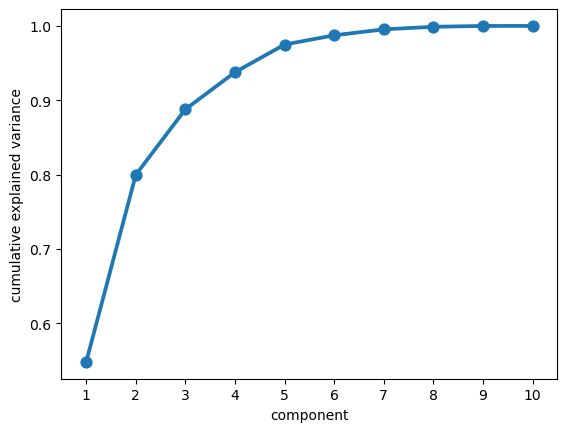

In [ ]:
# Fit a PCA model to X_zscore using PCA() with default parameters
#   and store in pca
pca = PCA().fit(X_zscore)

# Create a new DataFrame with 2 columns:
#   "component" with values 0 to the number of components in pca
#   "cumulative explained variance" with the .cumsum() of the explained_variance_ratio_ in pca
#   store in df_var
df_var = pd.DataFrame({'component': range(1, len(pca.explained_variance_ratio_) + 1),
                       'cumulative explained variance': pca.explained_variance_ratio_.cumsum()})

# Use sns.pointplot() to plot the data from df_var with
#   "component" on the x-axis
#   "cumulative explained variance" on the y-axis
sns.pointplot(x = 'component',
              y = 'cumulative explained variance',
              data = df_var)

# Note that over 55% of the variance is explained by the first component
# Over 80% by the first 2 components
# Over 90% by the first 4 components

In [28]:
# Fit and transform X_zscore using a new PCA model with n_components=2
# Store the transformed dataset in X_pca
X_pca = PCA(n_components = 2).fit_transform(X_zscore)

# Add feature names by creating a new DataFrame
#  containing X_pca
#  with the column names ['component0','component1']
#  store back into X_pca
X_pca = pd.DataFrame(X_pca, columns = ['component0', 'component1'])

# Assert that the pca representation has the same number of rows (569) but now 2 columns
assert X_pca.shape == (569,2)

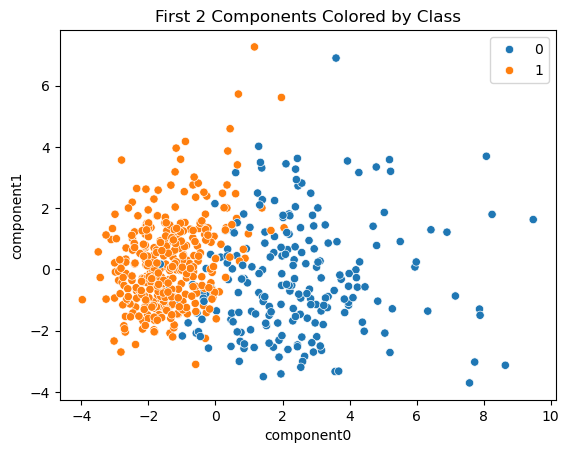

In [29]:
# Using seaborn, create a scatterplot of the data in X_pca
#  with component0 on the x-axis
#  and component1 on the y-axis
#  Color the points by their class assignment by setting hue=cancer.target
#  Capture the returned axis in ax
ax = sns.scatterplot(x = 'component0',
                     y = 'component1',
                     data = X_pca,
                     hue = cancer.target)

# Set the title to 'First 2 Components Colored by Class' using ax
ax.set_title('First 2 Components Colored by Class')
plt.show()

# Note that we haven't used the cancer.target information to generate the pca representation.
# We're coloring by cancer.target here to demonstrate that under this transformation
#   a linear model will do a decent job of separating the classes

In [30]:
# Load the dataset using fetch_20newsgroups().
#   Only fetch the two categories of interest using categories=['sci.space','rec.autos']
# Store in the result into newsgroups
newsgroups = fetch_20newsgroups(categories=['sci.space','rec.autos'])

# Store the newsgroups.data as docs, newsgroups.target as y and newsgroups.target_names as y_names
docs = newsgroups.data
y = newsgroups.target
y_names = newsgroups.target_names

# Print the number of observations by printing the length of docs
#  You should get 1187
len(docs)

1187

In [31]:
# Print the text of the first document in docs.
# Note: try printing both with and without the print() statement
#  with the print statement, linebreaks are parsed,
#  without, linebreaks are printed as excape characters
print (docs[0])
print()
docs[0]

From: prb@access.digex.com (Pat)
Subject: Re: Proton/Centaur?
Organization: Express Access Online Communications USA
Lines: 15
NNTP-Posting-Host: access.digex.net


Well thank you dennis for your as usual highly detailed and informative 
posting.   

The question i have about the proton, is  could it be  handled at
one of KSC's spare pads, without major  malfunction,  or could it be
handled at kourou  or Vandenberg?   

Now if it uses storables,  then  how long would it take for the russians
to equip something at cape york?

If  Proton were launched from a western site,  how would it compare to the
T4/centaur?   As i see it, it should lift  very close to the T4.

pat




"From: prb@access.digex.com (Pat)\nSubject: Re: Proton/Centaur?\nOrganization: Express Access Online Communications USA\nLines: 15\nNNTP-Posting-Host: access.digex.net\n\n\nWell thank you dennis for your as usual highly detailed and informative \nposting.   \n\nThe question i have about the proton, is  could it be  handled at\none of KSC's spare pads, without major  malfunction,  or could it be\nhandled at kourou  or Vandenberg?   \n\nNow if it uses storables,  then  how long would it take for the russians\nto equip something at cape york?\n\nIf  Proton were launched from a western site,  how would it compare to the\nT4/centaur?   As i see it, it should lift  very close to the T4.\n\npat\n"

In [32]:
# Print the target value of the first document in y.
print(y[0])

1


In [33]:
# Print the target_name of the first document using y_names and y.
print(y_names[y[0]])

sci.space


In [34]:
# Initialize a CountVectorizer object. It should
#   lowercase all text, 
#   include both unigrams and bigrams: ngram_range=(1,2)
#   exclude terms that occur in fewer than 10 documents: min_df=10
#   exclude terms that occur in more than 95% of documents: max_df=.95
# Store as cvect
cvect = CountVectorizer(lowercase = True,
                        ngram_range = (1, 2),
                        min_df = 10,
                        max_df = .95)

# Fit cvect on docs and transform docs into their term frequency representation.
# Store as X_tf
X_tf = cvect.fit_transform(docs)

# Print the shape of X_tf. 
# The number of rows should match the number of documents above
#  and the number of columns should be near 6000
print(X_tf.shape)

(1187, 5893)


In [35]:
# Print out the last 5 terms in the learned vocabulary in cvect
#   using .get_feature_names_out() which returns a list of terms corresponding
#   to the order of the columns in X_tf
# They should all be related to zoos or zoology
vocab = cvect.get_feature_names_out()
print(vocab[-5:])

['zoo' 'zoo toronto' 'zoology' 'zoology kipling' 'zoology lines']


In [36]:
# Get a set of 5-fold CV scores using
#  a RandomForestClassifier 
#   with 50 trees 
#   and n_jobs=-1 all other settings default
#   and the full dataset X_tf and y
# Store as cv_scores
clf = RandomForestClassifier(n_estimators=50,
                                   n_jobs = -1)
cv_scores = cross_val_score(clf,
                            X_tf,
                            y,
                            cv = 5)

# Print the mean of these cv_scores rounded to a precision of 2.
#  The mean accuracy should be above .9
print (cv_scores.mean().round(2))

0.97


In [37]:
# CountVectorizer stores the feature names (terms in the vocabulary) in two ways:
#  1. as a dictionary of term:colum_index pairs, accessed via cvect.vocabulary_
#  2. as a list of terms, in column index order, accessed via cvect.get_feature_names_out()
#
# We can get the indices of the most important features by training a new RandomForestClassifier on X_tf,y
#  and accessing .feature_importances_
#
# Using some combination of the above data-structures, 
#  print out the top 10 terms in the vocabulary
#  ranked by the feature importances learned by a RandomForestClassifier with 50 trees
# 
# The terms you find will likely not be surprising given the document categories.
clf = RandomForestClassifier(n_estimators=50,
                             n_jobs=-1)
clf.fit(X_tf, y)
feature_importances = clf.feature_importances_
feature_names = cvect.get_feature_names_out()
importance_df = pd.DataFrame({'feature names': feature_names,
                              'feature importances': feature_importances})
importance_df.sort_values('feature importances', ascending=False).head(10)

,feature names,feature importances
1011,car,0.040385
4463,space,0.034762
1039,cars,0.022844
3278,nasa,0.019998
3611,orbit,0.019962
4814,the car,0.013146
1905,flight,0.013069
3280,nasa gov,0.012457
4891,the moon,0.012095
3256,my,0.010821


In [38]:
# Load the dataset into 'digits' using load_digits
digits = load_digits()

# Extract digits['data'] to X_digits. No need to reshape as each image has already been flattened to 1x64
X_digits = digits['data']

# Extract the labels in digits['target'] to y_digits
y_digits = digits['target']

# Assert that the shape of X_digits is 1797 rows, 64 columns
assert X_digits.shape == (1797,64)

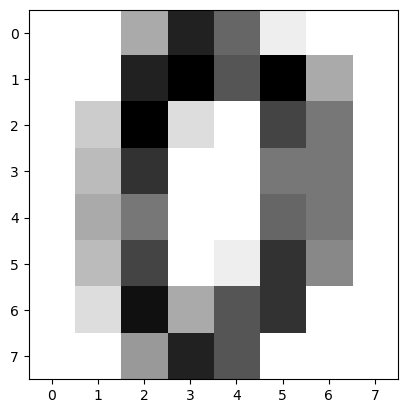

In [39]:
# We can use plt.imshow() to display one of the images as an example.
# 'digits['images']' is a list of images of size 8x8 pixels.
# We can plot the first image using plt.imshow with cmap=plt.cm.gray_r
# You should see a black '0' on a white background.
plt.imshow(digits['images'][0], cmap=plt.cm.gray_r);

In [40]:
# First we'll reduce our dataset from 64 to 2 dimensions using PCA for plotting

# Instantiate a pca object that will result in 2 components being returned.
#   Use n_components=2, random_state=512
# Store as pca
pca = PCA(n_components = 2,
          random_state = 512)

# Transform X_digits to 2D using fit_transform.
# Store as X_2D
X_2D = pca.fit_transform(X_digits)

# assert that the dataset has been reduced to 2 dimensions (2 columns)
assert X_2D.shape[1] == 2

<Axes: >

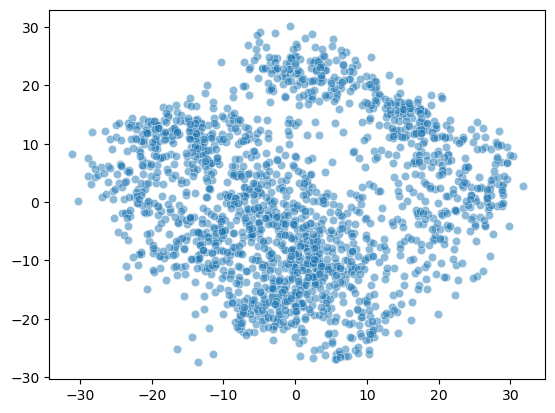

In [41]:
# Create a scatterplot of X_2D

# Use sns.scatterplot to plot X_2D with 
#   the first column of X_2D on the x-axis
#   the second column of X_2D on the y-axis
#   alpha=.5 to make points slightly transparent
sns.scatterplot(x = X_2D[:, 0],
                y = X_2D[:, 1],
                alpha = .5)

In [42]:
# Cluster the full dataset X_digits using KMeans


# Intantiate a KMeans object 
#   which will generate 10 clusters
#   use init='k-means++' 
#   and random_state=512
#   all other parameters as default (including init='k-means++')
# Store as km
km = KMeans(n_clusters = 10,
            init = 'k-means++',
            random_state = 512)

# Use .fit_predict() on X_digits to both fit our k-means model and generate cluster assignments.
# Store the result as cluster_assignments_km
cluster_assignments_km = km.fit_predict(X_digits)

# print the first 15 cluster assignments in cluster_assignments_km
#   They should all be integers between 0 and 9 inclusive
print(cluster_assignments_km[:15])

/Users/jacksonzhao/miniconda3/envs/eods/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[7 1 1 8 3 4 5 0 4 4 7 2 9 8 3]


<Axes: >

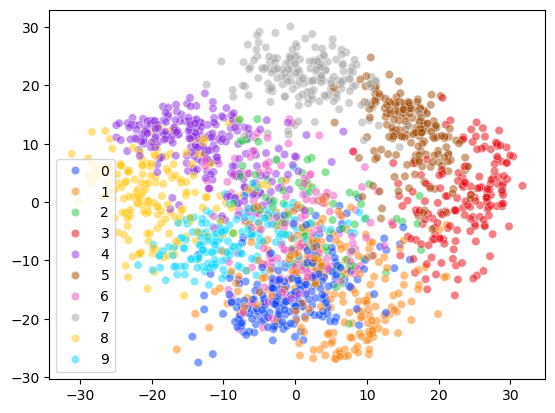

In [43]:
# Plot X_2D as a scatterplot colored by their cluster assignments

# Use sns.scatterplot to plot X_2D again with 
#   the first column of X_2D on the x-axis
#   the second column of X_2D on the y-axis
#   alpha=.5 to make points slightly transparent
#   hue=cluster_assignments_km to color each point by it's cluster assignment
#   palette='bright' to use a brighter color palette than the seaborn default
sns.scatterplot(x = X_2D[:, 0],
                y = X_2D[:, 1],
                alpha = .5,
                hue = cluster_assignments_km,
                palette = 'bright')


# Note that the legend shows cluster assignments, not digit label
# Also note that, since we are clustering in 64 dimensional space, the clusters will
#   appear to overlap in 2 dimensional space

In [44]:
# What are the labels for images placed in cluster 9?

# Since we actually have labels for these images we can see which 
#   digits were placed in cluster 9 without looking at the images themselves.

# Use y_digits and cluster_assignments_km to print the labels for 
#   images assigned to cluster 9
# You should see that most of the labels are digit 2 with some 1s and 8s
y_digits[cluster_assignments_km == 9]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 8, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Evaluate clustering using Homogeneity

# sklearn has a metric homogeneity_score which measures the homogeneity of clusters
# It returns a value between 0 and 1, where a higher value means more homogeneous.
# Compare the clustering assignments of Kmeans found above with an HAC model using Ward linkage

# generate cluster assignments of X_digits with AgglomerativeClustering 
#   using n_clusters=10 
#   and linkage='ward'
#   all other parameters as default
# store as cluster_assignments_hac
cluster_assignments_hac = AgglomerativeClustering(n_clusters = 10, linkage = 'ward').fit_predict(X_digits)

#Print the homogeneity scores for the clustering assigned by KMeans
print(f'homogeneity score for KMeans: {homogeneity_score(y_digits,cluster_assignments_km):0.2f}')

#Print the homeogeneity score for the clustering assinged by Agglomerative Clustering
print(f'homogeneity score for HAC   : {homogeneity_score(y_digits,cluster_assignments_hac):0.2f}')

homogeneity score for KMeans: 0.74
homogeneity score for HAC   : 0.86
